# Text Mining Assignment

In [1]:
import pandas as pd
import numpy as np 
import string 
import spacy 
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')

## Kindle Dataset

In [2]:
kindle = pd.read_csv('Amazon-reivew-export (1).csv',
                     encoding='latin',
                     error_bad_lines = False)
kindle

Review Content
0     Before I start this review, I just want to say...
1     UPDATE......\nAs I've used my new Oasis I've f...
2     My biggest concern is due to medical issues. I...
3     So I've been using a Kindle Paperwhite since 2...
4     I have a kindle keyboard that I got in 2011 th...
...                                                 ...
1043  The battery life doesnt last as long as adver...
1044  Love everything about my Kindle. So glad I spl...
1045  My Gen 9 Kindle Oasis had been working great, ...
1046  I was willing to pay the extra money to not ha...
1047  I upgraded from the original paper white Kindl...

[1048 rows x 1 columns]

In [3]:
kindle = kindle['Review Content']
kindle

0       Before I start this review, I just want to say...
1       UPDATE......\nAs I've used my new Oasis I've f...
2       My biggest concern is due to medical issues. I...
3       So I've been using a Kindle Paperwhite since 2...
4       I have a kindle keyboard that I got in 2011 th...
                              ...                        
1043    The battery life doesnt last as long as adver...
1044    Love everything about my Kindle. So glad I spl...
1045    My Gen 9 Kindle Oasis had been working great, ...
1046    I was willing to pay the extra money to not ha...
1047    I upgraded from the original paper white Kindl...
Name: Review Content, Length: 1048, dtype: object

In [4]:
kindle = [y.strip() for y in kindle]
kindle

["Before I start this review, I just want to say that I adore this e-reader regardless of any negative feedback. In fact, I took it over to show my mother and she loved it so much she got one for herself. For both of us, trying to read on a tablet for longer periods of time just isn't enjoyable. This is the first e-reader purchase for both of us after many years though I have had occasion to play with the newer generation of paperwhite/kindle in person before making this purchase.\n\nFirst things first - this device uses E-Ink. It works by having a multitude of microcapsules that when charged display either black or white. Just from that description alone, it's pretty obvious why this has no color, though color is in the works by the E-Ink developer, it's just years away from being workable on these types of devices. Obviously, this works differently than a tablet and its main purpose, as with all e-readers, is to give a good reading experience and mimic a page of a book as best as pos

In [5]:
kindle = [x for x in kindle if x] 
kindle

["Before I start this review, I just want to say that I adore this e-reader regardless of any negative feedback. In fact, I took it over to show my mother and she loved it so much she got one for herself. For both of us, trying to read on a tablet for longer periods of time just isn't enjoyable. This is the first e-reader purchase for both of us after many years though I have had occasion to play with the newer generation of paperwhite/kindle in person before making this purchase.\n\nFirst things first - this device uses E-Ink. It works by having a multitude of microcapsules that when charged display either black or white. Just from that description alone, it's pretty obvious why this has no color, though color is in the works by the E-Ink developer, it's just years away from being workable on these types of devices. Obviously, this works differently than a tablet and its main purpose, as with all e-readers, is to give a good reading experience and mimic a page of a book as best as pos

In [6]:
# Joining the list into one string/text
text = ' '.join(kindle)
text

'Before I start this review, I just want to say that I adore this e-reader regardless of any negative feedback. In fact, I took it over to show my mother and she loved it so much she got one for herself. For both of us, trying to read on a tablet for longer periods of time just isn\'t enjoyable. This is the first e-reader purchase for both of us after many years though I have had occasion to play with the newer generation of paperwhite/kindle in person before making this purchase.\n\nFirst things first - this device uses E-Ink. It works by having a multitude of microcapsules that when charged display either black or white. Just from that description alone, it\'s pretty obvious why this has no color, though color is in the works by the E-Ink developer, it\'s just years away from being workable on these types of devices. Obviously, this works differently than a tablet and its main purpose, as with all e-readers, is to give a good reading experience and mimic a page of a book as best as p

In [7]:
#Punctuation
no_punc_text = text.translate(str.maketrans("", "", string.punctuation)) 
no_punc_text

'Before I start this review I just want to say that I adore this ereader regardless of any negative feedback In fact I took it over to show my mother and she loved it so much she got one for herself For both of us trying to read on a tablet for longer periods of time just isnt enjoyable This is the first ereader purchase for both of us after many years though I have had occasion to play with the newer generation of paperwhitekindle in person before making this purchase\n\nFirst things first  this device uses EInk It works by having a multitude of microcapsules that when charged display either black or white Just from that description alone its pretty obvious why this has no color though color is in the works by the EInk developer its just years away from being workable on these types of devices Obviously this works differently than a tablet and its main purpose as with all ereaders is to give a good reading experience and mimic a page of a book as best as possible while also being easi

In [8]:
#Tokenization
from nltk.tokenize import word_tokenize

text_tokens = word_tokenize(no_punc_text)
text_tokens

['Before',
 'I',
 'start',
 'this',
 'review',
 'I',
 'just',
 'want',
 'to',
 'say',
 'that',
 'I',
 'adore',
 'this',
 'ereader',
 'regardless',
 'of',
 'any',
 'negative',
 'feedback',
 'In',
 'fact',
 'I',
 'took',
 'it',
 'over',
 'to',
 'show',
 'my',
 'mother',
 'and',
 'she',
 'loved',
 'it',
 'so',
 'much',
 'she',
 'got',
 'one',
 'for',
 'herself',
 'For',
 'both',
 'of',
 'us',
 'trying',
 'to',
 'read',
 'on',
 'a',
 'tablet',
 'for',
 'longer',
 'periods',
 'of',
 'time',
 'just',
 'isnt',
 'enjoyable',
 'This',
 'is',
 'the',
 'first',
 'ereader',
 'purchase',
 'for',
 'both',
 'of',
 'us',
 'after',
 'many',
 'years',
 'though',
 'I',
 'have',
 'had',
 'occasion',
 'to',
 'play',
 'with',
 'the',
 'newer',
 'generation',
 'of',
 'paperwhitekindle',
 'in',
 'person',
 'before',
 'making',
 'this',
 'purchase',
 'First',
 'things',
 'first',
 'this',
 'device',
 'uses',
 'EInk',
 'It',
 'works',
 'by',
 'having',
 'a',
 'multitude',
 'of',
 'microcapsules',
 'that',
 'whe

In [9]:
text_tokens[0:72]

['Before',
 'I',
 'start',
 'this',
 'review',
 'I',
 'just',
 'want',
 'to',
 'say',
 'that',
 'I',
 'adore',
 'this',
 'ereader',
 'regardless',
 'of',
 'any',
 'negative',
 'feedback',
 'In',
 'fact',
 'I',
 'took',
 'it',
 'over',
 'to',
 'show',
 'my',
 'mother',
 'and',
 'she',
 'loved',
 'it',
 'so',
 'much',
 'she',
 'got',
 'one',
 'for',
 'herself',
 'For',
 'both',
 'of',
 'us',
 'trying',
 'to',
 'read',
 'on',
 'a',
 'tablet',
 'for',
 'longer',
 'periods',
 'of',
 'time',
 'just',
 'isnt',
 'enjoyable',
 'This',
 'is',
 'the',
 'first',
 'ereader',
 'purchase',
 'for',
 'both',
 'of',
 'us',
 'after',
 'many',
 'years']

In [10]:
len(text_tokens)

213025

In [11]:
from nltk.corpus import stopwords

In [12]:
my_stop_words = stopwords.words('english')
my_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [13]:
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:65])

['Before', 'I', 'start', 'review', 'I', 'want', 'say', 'I', 'adore', 'ereader', 'regardless', 'negative', 'feedback', 'In', 'fact', 'I', 'took', 'show', 'mother', 'loved', 'much', 'got', 'one', 'For', 'us', 'trying', 'read', 'tablet', 'longer', 'periods', 'time', 'isnt', 'enjoyable', 'This', 'first', 'ereader', 'purchase', 'us', 'many', 'years', 'though', 'I', 'occasion', 'play', 'newer', 'generation', 'paperwhitekindle', 'person', 'making', 'purchase', 'First', 'things', 'first', 'device', 'uses', 'EInk', 'It', 'works', 'multitude', 'microcapsules', 'charged', 'display', 'either', 'black', 'white']


In [14]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:45])

['before', 'i', 'start', 'review', 'i', 'want', 'say', 'i', 'adore', 'ereader', 'regardless', 'negative', 'feedback', 'in', 'fact', 'i', 'took', 'show', 'mother', 'loved', 'much', 'got', 'one', 'for', 'us', 'trying', 'read', 'tablet', 'longer', 'periods', 'time', 'isnt', 'enjoyable', 'this', 'first', 'ereader', 'purchase', 'us', 'many', 'years', 'though', 'i', 'occasion', 'play', 'newer']


In [15]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['befor', 'i', 'start', 'review', 'i', 'want', 'say', 'i', 'ador', 'eread', 'regardless', 'neg', 'feedback', 'in', 'fact', 'i', 'took', 'show', 'mother', 'love', 'much', 'got', 'one', 'for', 'us', 'tri', 'read', 'tablet', 'longer', 'period', 'time', 'isnt', 'enjoy', 'thi', 'first', 'eread', 'purchas', 'us', 'mani', 'year']


In [16]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm')

In [17]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

Before I start review I want say I adore ereader regardless negative feedback In fact I took show mother loved much got one For us trying read tablet longer periods time isnt enjoyable This first ereader purchase us many


In [18]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:22])

['before', 'I', 'start', 'review', 'I', 'want', 'say', 'I', 'adore', 'ereader', 'regardless', 'negative', 'feedback', 'in', 'fact', 'I', 'take', 'show', 'mother', 'love', 'much', 'get']


### Feature Extraction :

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [20]:
pd.DataFrame.from_records([vectorizer.vocabulary_])

before  start  review  want   say  adore  ereader  regardless  negative  \
0     821   5596    5045  6407  5163    367     2102        4892      3920   

   feedback  ...  validation  hoop  frequency  autolight  replaced  brighten  \
0      2297  ...        6314  2905       2487        690      4960      1010   

   calculation  unreasonable  upcoming  tactic  
0         1092          6225      6249    5804  

[1 rows x 6651 columns]

In [21]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T

0
before         821
start         5596
review        5045
want          6407
say           5163
...            ...
brighten      1010
calculation   1092
unreasonable  6225
upcoming      6249
tactic        5804

[6651 rows x 1 columns]

In [22]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=False).head(30)

0
zooming       6650
zoom          6649
zones         6648
zone          6647
zippy         6646
zipper        6645
zerod         6644
zero          6643
yr            6642
youtube       6641
yourselfthis  6640
yours         6639
your          6638
young         6637
youif         6636
you           6635
yolo          6634
yo            6633
ymmv          6632
yknow         6631
yield         6630
yetand        6629
yet           6628
yesterday     6627
yes           6626
yep           6625
yelloworange  6624
yellowish     6623
yellowing     6622
yellower      6621

In [23]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=True).head(25)

0
020220      0
030         1
05          2
08          3
092022      4
10          5
100         6
1000        7
10000       8
1000s       9
100s       10
1010       11
10122021   12
1014       13
1015       14
102        15
1020       16
102120     17
10272020   18
1042021    19
10atatime  20
10off      21
10th       22
10x        23
11         24

In [24]:
print(vectorizer.vocabulary_)

{'before': 821, 'start': 5596, 'review': 5045, 'want': 6407, 'say': 5163, 'adore': 367, 'ereader': 2102, 'regardless': 4892, 'negative': 3920, 'feedback': 2297, 'in': 3029, 'fact': 2241, 'take': 5809, 'show': 5334, 'mother': 3839, 'love': 3549, 'much': 3856, 'get': 2586, 'one': 4142, 'for': 2437, 'we': 6447, 'try': 6091, 'read': 4783, 'tablet': 5799, 'long': 3523, 'period': 4385, 'time': 5963, 'be': 795, 'not': 4024, 'enjoyable': 2063, 'this': 5925, 'first': 2358, 'purchase': 4698, 'many': 3633, 'year': 6614, 'though': 5932, 'occasion': 4094, 'play': 4472, 'new': 3939, 'generation': 2572, 'paperwhitekindle': 4308, 'person': 4402, 'make': 3609, 'thing': 5912, 'device': 1724, 'use': 6291, 'eink': 1998, 'it': 3232, 'work': 6572, 'multitude': 3862, 'microcapsule': 3724, 'charge': 1187, 'display': 1822, 'either': 2000, 'black': 890, 'white': 6500, 'just': 3282, 'description': 1690, 'alone': 467, 'pretty': 4597, 'obvious': 4092, 'color': 1291, 'developer': 1722, 'away': 719, 'workable': 6573

In [25]:
print(vectorizer.get_feature_names()[50:100])

['152', '1520', '16', '167', '16a', '16hours', '17', '170', '175', '18', '180', '180degree', '189', '18month', '19', '196', '199', '1995', '1999', '1a', '1st', '1year', '20', '200', '2000', '20000', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '201516', '2016', '2017', '2018', '2019', '20190802', '2020', '20200820', '2021', '2022', '2022only', '2030', '21']


In [27]:
#print(X.toarray()[50:100])

In [29]:
#print(X.toarray().shape)

#### Let's see how can bigrams and trigrams can be included here

In [30]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',
                                         ngram_range=(1,4),
                                         max_features = 100)

bow_matrix_ngram = vectorizer_ngram_range.fit_transform(kindle)
bow_matrix_ngram

<1048x100 sparse matrix of type '<class 'numpy.int64'>'
	with 45733 stored elements in Compressed Sparse Row format>

In [31]:
print(vectorizer_ngram_range.get_feature_names())

['about', 'all', 'also', 'am', 'amazon', 'an', 'and', 'and the', 'are', 'as', 'at', 'back', 'battery', 'battery life', 'be', 'because', 'book', 'books', 'but', 'buttons', 'can', 'device', 'do', 'don', 'even', 'for', 'from', 'get', 'had', 'has', 'have', 'hold', 'if', 'if you', 'in', 'in the', 'is', 'it', 'it is', 'just', 'kindle', 'life', 'light', 'like', 'love', 'me', 'more', 'much', 'my', 'new', 'no', 'not', 'now', 'oasis', 'of', 'of the', 'off', 'on', 'on the', 'one', 'only', 'or', 'out', 'page', 'paperwhite', 'read', 'reader', 'reading', 'really', 'screen', 'so', 'still', 'than', 'that', 'the', 'the battery', 'the kindle', 'the oasis', 'the screen', 'there', 'they', 'this', 'this is', 'time', 'to', 'to the', 'turn', 'up', 'use', 've', 'very', 'was', 'when', 'which', 'will', 'with', 'with the', 'would', 'you', 'your']


In [32]:
print(bow_matrix_ngram.toarray())

[[ 1  7  3 ...  8 20  3]
 [ 0  2  0 ...  3  5  1]
 [ 2  2  1 ...  2  5  2]
 ...
 [ 0  0  1 ...  0  0  0]
 [ 0  0  0 ...  1  0  0]
 [ 0  0  1 ...  0  0  0]]


#### TFidf vectorizer :

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_n_gram_max_features = TfidfVectorizer(norm="",
                                                 analyzer='word',
                                                 ngram_range=(1,4),
                                                 max_features = 100)

tf_idf_matrix_n_gram_max_features = vectorizer_n_gram_max_features.fit_transform(kindle)

In [34]:
print(vectorizer_n_gram_max_features.get_feature_names())

['about', 'all', 'also', 'am', 'amazon', 'an', 'and', 'and the', 'are', 'as', 'at', 'back', 'battery', 'battery life', 'be', 'because', 'book', 'books', 'but', 'buttons', 'can', 'device', 'do', 'don', 'even', 'for', 'from', 'get', 'had', 'has', 'have', 'hold', 'if', 'if you', 'in', 'in the', 'is', 'it', 'it is', 'just', 'kindle', 'life', 'light', 'like', 'love', 'me', 'more', 'much', 'my', 'new', 'no', 'not', 'now', 'oasis', 'of', 'of the', 'off', 'on', 'on the', 'one', 'only', 'or', 'out', 'page', 'paperwhite', 'read', 'reader', 'reading', 'really', 'screen', 'so', 'still', 'than', 'that', 'the', 'the battery', 'the kindle', 'the oasis', 'the screen', 'there', 'they', 'this', 'this is', 'time', 'to', 'to the', 'turn', 'up', 'use', 've', 'very', 'was', 'when', 'which', 'will', 'with', 'with the', 'would', 'you', 'your']


In [35]:
print(tf_idf_matrix_n_gram_max_features.toarray())

[[ 2.03133681 14.05290333  6.26737365 ... 15.45716012 33.39189028
   7.33861282]
 [ 0.          4.01511524  0.         ...  5.79643505  8.34797257
   2.44620427]
 [ 4.06267362  4.01511524  2.08912455 ...  3.86429003  8.34797257
   4.89240854]
 ...
 [ 0.          0.          2.08912455 ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  1.93214502  0.
   0.        ]
 [ 0.          0.          2.08912455 ...  0.          0.
   0.        ]]


####  Generate wordcloud :

In [36]:
# Define a function to plot word cloud

def plot_cloud(wordcloud):
    
    
    plt.figure(figsize=(60, 40))    # Set figure size

    
    plt.imshow(wordcloud)           # Display image
    
    
    plt.axis("off")                 # No axis details

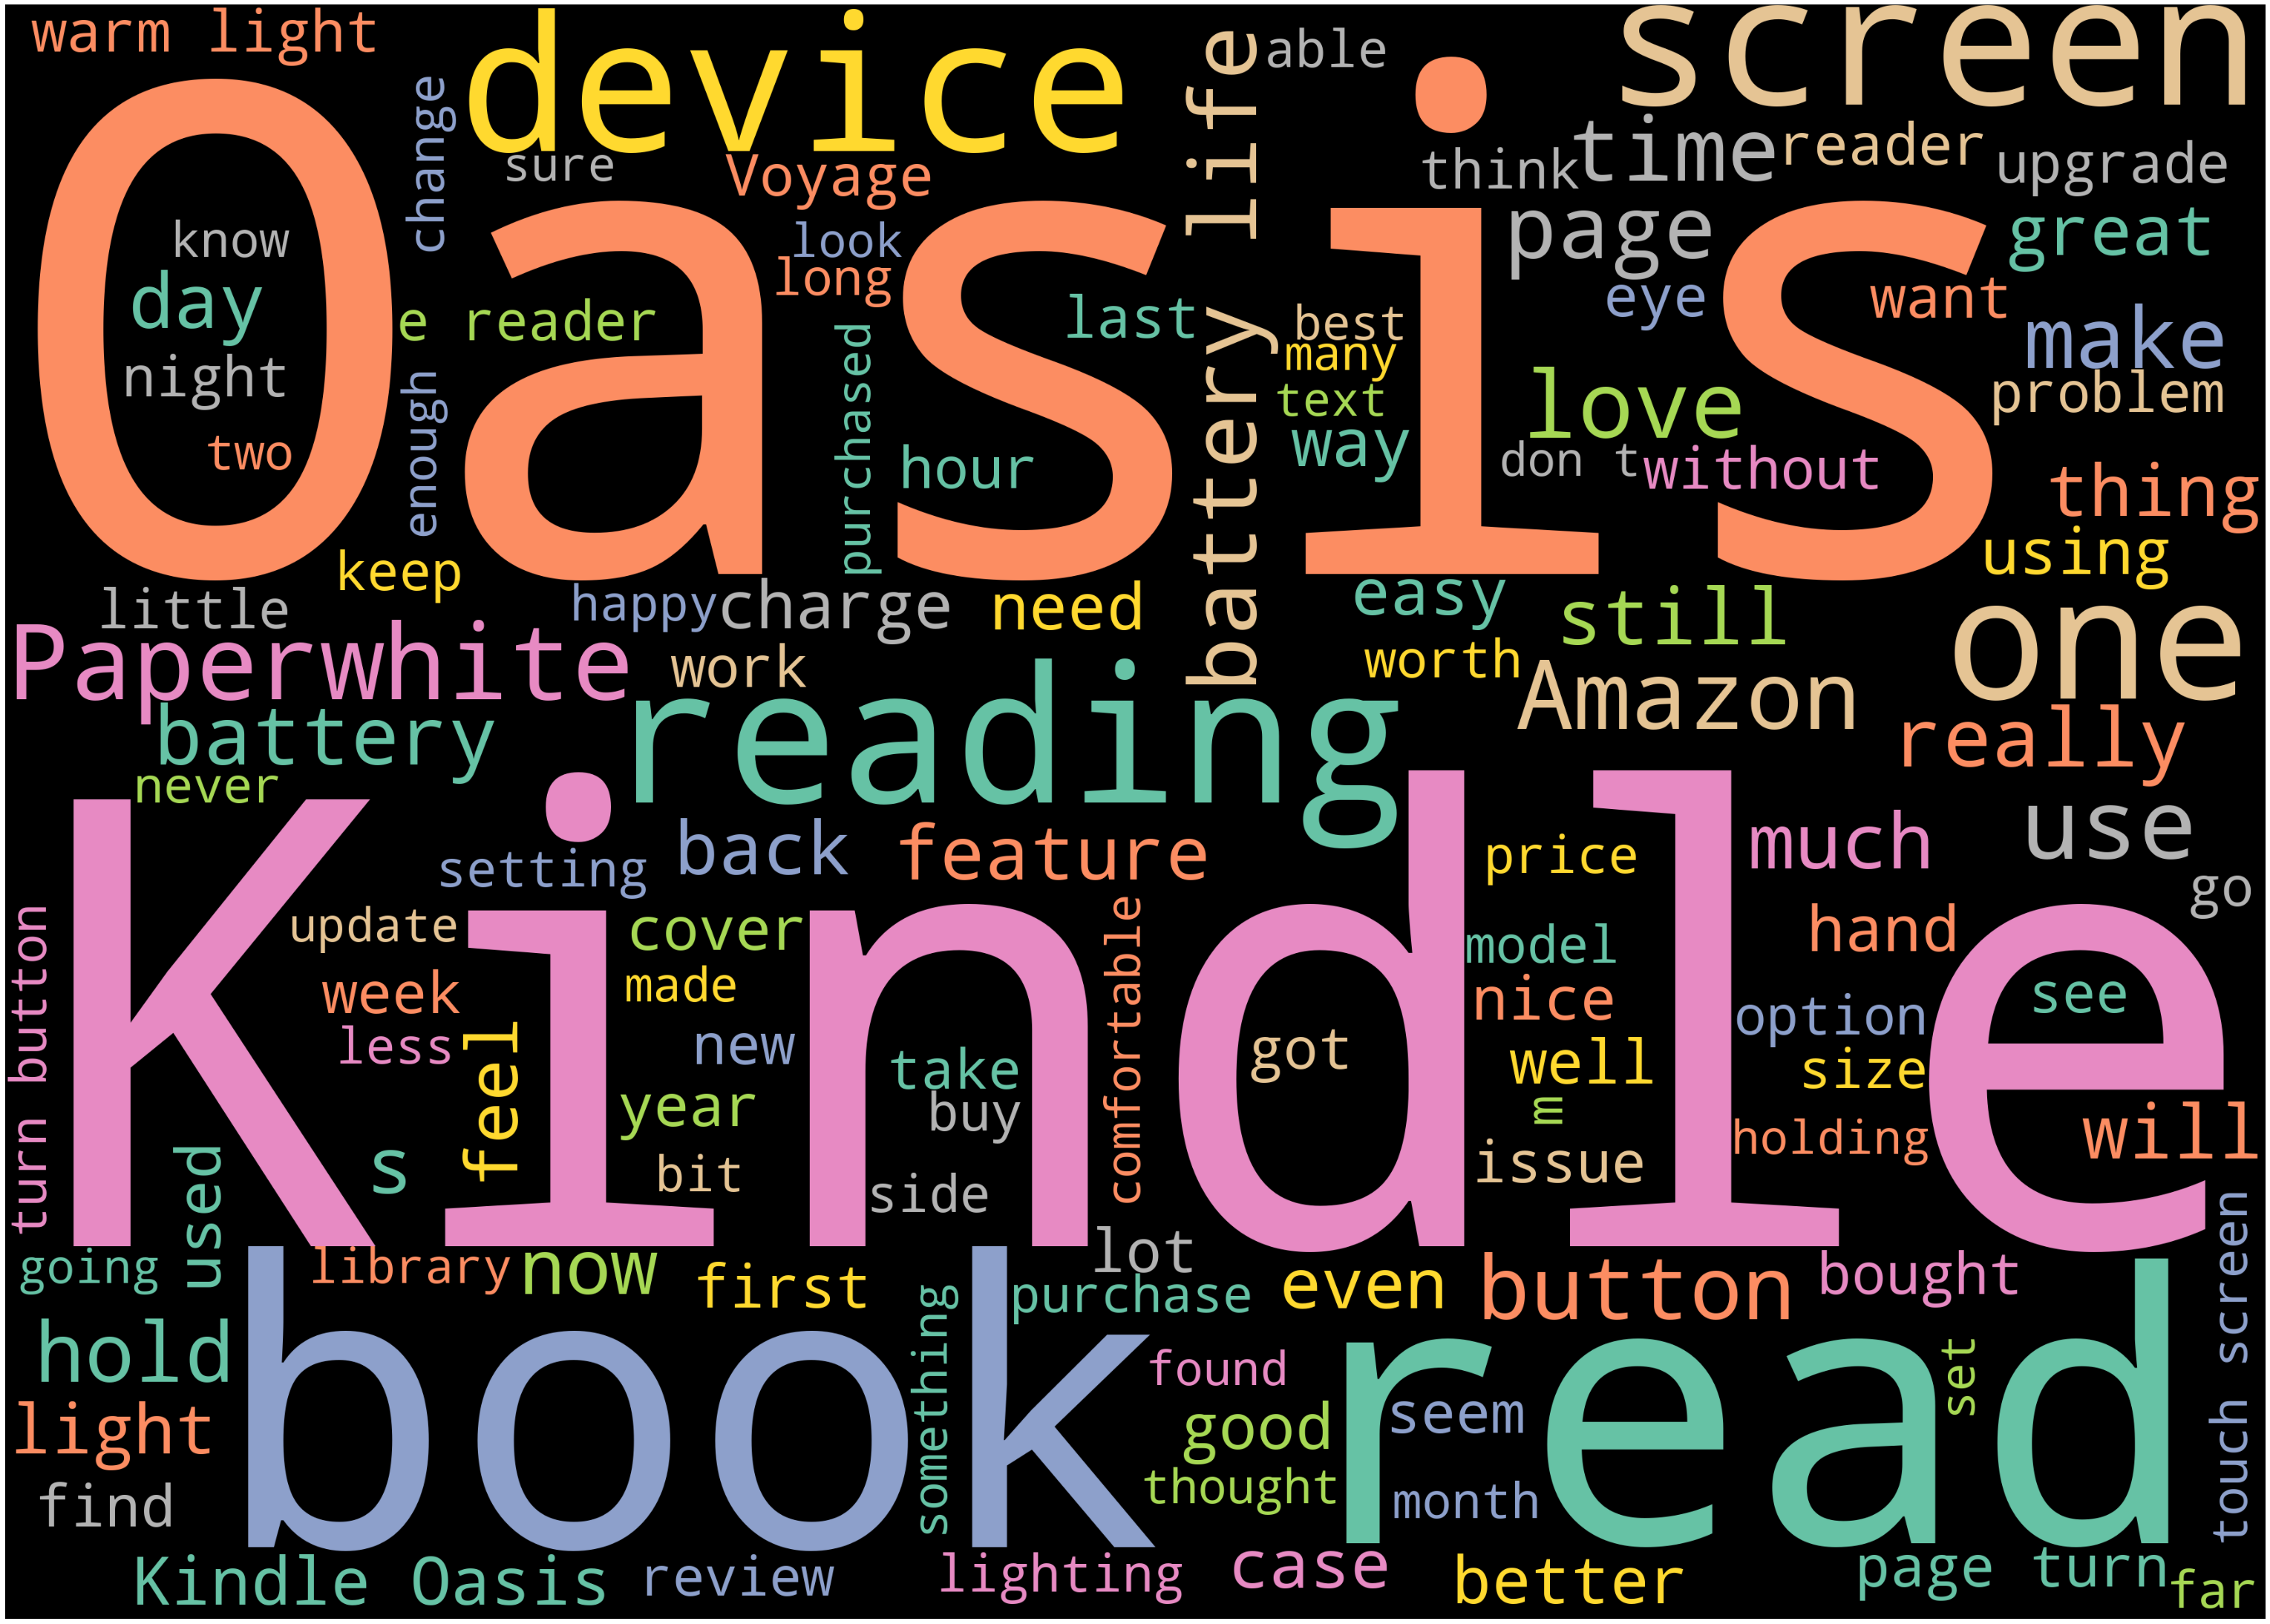

In [37]:
# Generate wordcloud
wordcloud = WordCloud(width = 3500, 
                      height = 2500,
                      background_color='black',
                      max_words=120,
                      colormap='Set2').generate(text)
# Plot
plot_cloud(wordcloud)

In [38]:
kindle2 = pd.read_csv('Amazon-reivew-export (1).csv', encoding='latin', error_bad_lines = False)
kindle2

Review Content
0     Before I start this review, I just want to say...
1     UPDATE......\nAs I've used my new Oasis I've f...
2     My biggest concern is due to medical issues. I...
3     So I've been using a Kindle Paperwhite since 2...
4     I have a kindle keyboard that I got in 2011 th...
...                                                 ...
1043  The battery life doesnt last as long as adver...
1044  Love everything about my Kindle. So glad I spl...
1045  My Gen 9 Kindle Oasis had been working great, ...
1046  I was willing to pay the extra money to not ha...
1047  I upgraded from the original paper white Kindl...

[1048 rows x 1 columns]

In [39]:
kindle2 = kindle2['Review Content']
kindle2

0       Before I start this review, I just want to say...
1       UPDATE......\nAs I've used my new Oasis I've f...
2       My biggest concern is due to medical issues. I...
3       So I've been using a Kindle Paperwhite since 2...
4       I have a kindle keyboard that I got in 2011 th...
                              ...                        
1043    The battery life doesnt last as long as adver...
1044    Love everything about my Kindle. So glad I spl...
1045    My Gen 9 Kindle Oasis had been working great, ...
1046    I was willing to pay the extra money to not ha...
1047    I upgraded from the original paper white Kindl...
Name: Review Content, Length: 1048, dtype: object

In [40]:
kindle2 = [x.strip() for x in kindle2] # remove both the leading and the trailing characters
kindle2 = [x for x in kindle2 if x] # removes empty strings, because they are considered in Python as False
kindle2[0:10]

["Before I start this review, I just want to say that I adore this e-reader regardless of any negative feedback. In fact, I took it over to show my mother and she loved it so much she got one for herself. For both of us, trying to read on a tablet for longer periods of time just isn't enjoyable. This is the first e-reader purchase for both of us after many years though I have had occasion to play with the newer generation of paperwhite/kindle in person before making this purchase.\n\nFirst things first - this device uses E-Ink. It works by having a multitude of microcapsules that when charged display either black or white. Just from that description alone, it's pretty obvious why this has no color, though color is in the works by the E-Ink developer, it's just years away from being workable on these types of devices. Obviously, this works differently than a tablet and its main purpose, as with all e-readers, is to give a good reading experience and mimic a page of a book as best as pos

In [41]:
one_block = kindle2[1]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [42]:
one_block

'UPDATE......\nAs I\'ve used my new Oasis I\'ve found a few things that could be different.........\n\nAs many reviewers have found, battery life is not up to the older Kindles, but.....since I\'m dumping books in manually every few days this is not important to me since it\'s being recharged often.\n\nI\'ve found an oddity with how books are displayed......Some are shown with author first, title second, some are title first, author second. I\'ve found no reason for this, and it\'s just "different".\nSince I get books from Amazon and my public library and other sources I\'m not sure what\'s going on with this.\nAgain, I\'d like to see the actual book cover, not an icon.\n\nI\'ve found that when reading with one hand I occasionally hit SOMETHING on the touch screen and things can change....... Font can change, size of the page can be expanded, and the location in the book can disappear from the bottom of the display.\nFortunately, the Oasis offers a screen lock function.\n\nMy KOBO Libr

In [43]:
for token in doc_block[:]:
    print(token, token.pos_)

UPDATE NOUN
...... PUNCT

 SPACE
As SCONJ
I PRON
've AUX
used VERB
my PRON
new ADJ
Oasis NOUN
I PRON
've AUX
found VERB
a DET
few ADJ
things NOUN
that PRON
could AUX
be AUX
different ADJ
......... PUNCT


 SPACE
As SCONJ
many ADJ
reviewers NOUN
have AUX
found VERB
, PUNCT
battery NOUN
life NOUN
is AUX
not PART
up ADP
to ADP
the DET
older ADJ
Kindles PROPN
, PUNCT
but CCONJ
..... PUNCT
since SCONJ
I PRON
'm AUX
dumping VERB
books NOUN
in ADP
manually ADV
every DET
few ADJ
days NOUN
this PRON
is AUX
not PART
important ADJ
to ADP
me PRON
since SCONJ
it PRON
's AUX
being AUX
recharged VERB
often ADV
. PUNCT


 SPACE
I PRON
've AUX
found VERB
an DET
oddity NOUN
with ADP
how SCONJ
books NOUN
are AUX
displayed VERB
...... PUNCT
Some PRON
are AUX
shown VERB
with ADP
author NOUN
first ADV
, PUNCT
title NOUN
second ADV
, PUNCT
some PRON
are AUX
title NOUN
first ADV
, PUNCT
author NOUN
second ADJ
. PUNCT
I PRON
've AUX
found VERB
no DET
reason NOUN
for ADP
this PRON
, PUNCT
and CCONJ
it PRON
's A

unlike ADP
the DET
KOBO PROPN
I PRON
'm AUX
not PART
constantly ADV
having VERB
to PART
use VERB
a DET
cloth NOUN
to PART
clean VERB
it PRON
off ADP
. PUNCT

 SPACE
The DET
page NOUN
turn NOUN
buttons NOUN
work VERB
very ADV
well ADV
with ADP
just ADV
the DET
right ADJ
feel NOUN
. PUNCT

 SPACE
Screen NOUN
brightness NOUN
can AUX
be AUX
set VERB
easily ADV
and CCONJ
the DET
e NOUN
- NOUN
ink NOUN
display NOUN
is AUX
very ADV
readable ADJ
. PUNCT


 SPACE
The DET
only ADJ
complaints NOUN
are AUX
that SCONJ
the DET
owner NOUN
's PART
manual NOUN
is AUX
slightly ADV
different ADJ
from ADP
my PRON
new ADJ
Oasis NOUN
. PUNCT

 SPACE
Directions NOUN
do AUX
n't PART
match VERB
up ADP
with ADP
what PRON
I PRON
see VERB
on ADP
the DET
new ADJ
model NOUN
and CCONJ
I PRON
wish VERB
Amazon PROPN
had AUX
updated VERB
the DET
manual NOUN
to PART
avoid VERB
confusion NOUN
and CCONJ
having VERB
to PART
hunt VERB
for ADP
features NOUN
. PUNCT

 SPACE
Some DET
features NOUN
in ADP
the DET
manual NOUN
ar

In [44]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]

#print(nouns_verbs[5:25])
nouns_verbs

['UPDATE',
 'used',
 'Oasis',
 'found',
 'things',
 'reviewers',
 'found',
 'battery',
 'life',
 'dumping',
 'books',
 'days',
 'recharged',
 'found',
 'oddity',
 'books',
 'displayed',
 'shown',
 'author',
 'title',
 'title',
 'author',
 'found',
 'reason',
 'get',
 'books',
 'library',
 'sources',
 'going',
 'like',
 'see',
 'book',
 'cover',
 'icon',
 'found',
 'reading',
 'hand',
 'hit',
 'touch',
 'screen',
 'things',
 'change',
 'change',
 'size',
 'page',
 'expanded',
 'location',
 'book',
 'disappear',
 'bottom',
 'display',
 'Oasis',
 'offers',
 'screen',
 'lock',
 'function',
 'offered',
 'option',
 'displaying',
 'page',
 'number',
 'have',
 'Oasis',
 'showing',
 'percentage',
 'read',
 'page',
 'numbers',
 'make',
 'find',
 'others',
 'stated',
 'advertising',
 'ad',
 'supported',
 'getting',
 'hand',
 'home',
 'screen',
 'ads',
 'library',
 'showing',
 'books',
 'top',
 'home',
 'page',
 'see',
 'books',
 'library',
 'list',
 'view',
 'give',
 'break',
 'ads',
 'Removing',

In [45]:
len(nouns_verbs)

355

In [46]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
X

<355x197 sparse matrix of type '<class 'numpy.int64'>'
	with 343 stored elements in Compressed Sparse Row format>

In [47]:
X.shape

(355, 197)

In [48]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [49]:
cv.get_feature_names()

['account',
 'ad',
 'ads',
 'advertising',
 'asking',
 'author',
 'avoid',
 'battery',
 'book',
 'books',
 'bottom',
 'bought',
 'break',
 'brightness',
 'bundle',
 'buttons',
 'buy',
 'change',
 'charge',
 'clean',
 'cloth',
 'cloud',
 'cluttering',
 'complaints',
 'confusion',
 'cost',
 'cover',
 'covers',
 'days',
 'decided',
 'deplete',
 'directions',
 'disappear',
 'disappointment',
 'display',
 'displayed',
 'displaying',
 'dump',
 'dumping',
 'eat',
 'equipment',
 'erased',
 'expand',
 'expanded',
 'fabric',
 'fail',
 'features',
 'feel',
 'feels',
 'figure',
 'find',
 'finger',
 'finishing',
 'found',
 'function',
 'get',
 'getting',
 'give',
 'giving',
 'go',
 'going',
 'got',
 'gotten',
 'hand',
 'handling',
 'has',
 'have',
 'having',
 'hit',
 'home',
 'hours',
 'hunt',
 'icon',
 'icons',
 'ink',
 'issue',
 'keep',
 'keyboard',
 'know',
 'library',
 'life',
 'lighting',
 'like',
 'line',
 'list',
 'location',
 'lock',
 'lot',
 'magnify',
 'make',
 'manual',
 'maps',
 'match'

In [50]:
#pd.DataFrame(X.toarray(), columns = sorted(cv.vocabulary_))
# Or
temp_df = pd.DataFrame(X.toarray(), columns = cv.get_feature_names())
temp_df

account  ad  ads  advertising  asking  author  avoid  battery  book  \
0          0   0    0            0       0       0      0        0     0   
1          0   0    0            0       0       0      0        0     0   
2          0   0    0            0       0       0      0        0     0   
3          0   0    0            0       0       0      0        0     0   
4          0   0    0            0       0       0      0        0     0   
..       ...  ..  ...          ...     ...     ...    ...      ...   ...   
350        0   0    0            0       0       0      0        0     0   
351        0   0    0            0       0       0      0        0     0   
352        0   0    0            0       0       0      0        0     0   
353        0   0    0            0       0       0      0        0     0   
354        0   0    0            0       0       0      0        0     0   

     books  ...  want  wanted  way  wish  work  works  world  wring  year  \
0        0  ...     0       0    0     0     0      0      0      0     0   
1        0  ...     0       0    0     0     0      0      0      0     0   
2        0  ...     0       0    0     0     0      0      0      0     0   
3        0  ...     0       0    0     0     0      0      0      0     0   
4        0  ...     0       0    0     0     0      0      0      0     0   
..     ...  ...   ...     ...  ...   ...   ...    ...    ...    ...   ...   
350      0  ...     0       0    0     0     0      0      0      0     0   
351      0  ...     0       0    0     0     0      0      0      0     0   
352      0  ...     0       0    0     0     0      0      0      1     0   
353      0  ...     0       0    0     0     0      0      0      0     0   
354      0  ...     0       0    0     0     0      0      0      0     0   

     years  
0        0  
1        0  
2        0  
3        0  
4        0  
..     ...  
350      0  
351      0  
352      0  
353      0  
354      0  

[355 rows x 197 columns]

In [51]:
sum_words = X.sum(axis=0) #Column total
sum_words

matrix([[ 2,  1,  2,  1,  1,  2,  1,  3, 11, 12,  1,  3,  1,  1,  2,  1,
          2,  2,  1,  1,  1,  1,  1,  1,  1,  1,  8,  1,  2,  2,  1,  1,
          1,  1,  2,  3,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  2,  1,
          1,  2,  1,  2,  1,  5,  2,  4,  2,  3,  1,  1,  3,  1,  1,  2,
          1,  2,  6,  2,  1,  3,  1,  1,  1,  1,  1,  3,  1,  1,  1,  6,
          3,  1,  5,  1,  1,  1,  1,  1,  1,  1,  3,  1,  1,  1,  1,  1,
          1,  1,  1,  1,  1, 11,  1,  1,  2,  1,  1,  1,  1,  1,  1,  6,
          1,  1,  1,  1,  1,  1,  1,  2,  1,  2,  1,  2,  1,  2,  3,  4,
          2,  3,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  9,  5,
          1,  2,  1,  2,  1,  1,  2,  1,  3,  1,  1,  1,  1,  1,  1,  1,
          1,  1,  2,  1,  2,  1,  1,  1,  1,  1,  1,  2,  1,  1,  2,  2,
          1,  1,  2,  1,  1,  1,  1,  3,  1,  2,  1,  5,  1,  3,  1,  1,
          1,  1,  1,  1,  1]], dtype=int64)

In [52]:
type(sum_words)

numpy.matrix

In [53]:
cv.vocabulary_

{'update': 181,
 'used': 184,
 'oasis': 101,
 'found': 53,
 'things': 171,
 'reviewers': 139,
 'battery': 7,
 'life': 80,
 'dumping': 38,
 'books': 9,
 'days': 28,
 'recharged': 132,
 'oddity': 102,
 'displayed': 35,
 'shown': 151,
 'author': 5,
 'title': 174,
 'reason': 130,
 'get': 55,
 'library': 79,
 'sources': 158,
 'going': 60,
 'like': 82,
 'see': 143,
 'book': 8,
 'cover': 26,
 'icon': 72,
 'reading': 129,
 'hand': 63,
 'hit': 68,
 'touch': 176,
 'screen': 142,
 'change': 17,
 'size': 154,
 'page': 111,
 'expanded': 43,
 'location': 85,
 'disappear': 32,
 'bottom': 10,
 'display': 34,
 'offers': 104,
 'lock': 86,
 'function': 54,
 'offered': 103,
 'option': 108,
 'displaying': 36,
 'number': 99,
 'have': 66,
 'showing': 150,
 'percentage': 114,
 'read': 126,
 'numbers': 100,
 'make': 89,
 'find': 50,
 'others': 109,
 'stated': 163,
 'advertising': 3,
 'ad': 1,
 'supported': 165,
 'getting': 56,
 'home': 69,
 'ads': 2,
 'top': 175,
 'list': 84,
 'view': 185,
 'give': 57,
 'break

In [54]:
sorted(cv.vocabulary_)

['account',
 'ad',
 'ads',
 'advertising',
 'asking',
 'author',
 'avoid',
 'battery',
 'book',
 'books',
 'bottom',
 'bought',
 'break',
 'brightness',
 'bundle',
 'buttons',
 'buy',
 'change',
 'charge',
 'clean',
 'cloth',
 'cloud',
 'cluttering',
 'complaints',
 'confusion',
 'cost',
 'cover',
 'covers',
 'days',
 'decided',
 'deplete',
 'directions',
 'disappear',
 'disappointment',
 'display',
 'displayed',
 'displaying',
 'dump',
 'dumping',
 'eat',
 'equipment',
 'erased',
 'expand',
 'expanded',
 'fabric',
 'fail',
 'features',
 'feel',
 'feels',
 'figure',
 'find',
 'finger',
 'finishing',
 'found',
 'function',
 'get',
 'getting',
 'give',
 'giving',
 'go',
 'going',
 'got',
 'gotten',
 'hand',
 'handling',
 'has',
 'have',
 'having',
 'hit',
 'home',
 'hours',
 'hunt',
 'icon',
 'icons',
 'ink',
 'issue',
 'keep',
 'keyboard',
 'know',
 'library',
 'life',
 'lighting',
 'like',
 'line',
 'list',
 'location',
 'lock',
 'lot',
 'magnify',
 'make',
 'manual',
 'maps',
 'match'

In [55]:
wf_df = pd.DataFrame({'word' : cv.get_feature_names(),
                      'count' : np.array(sum_words).flatten()})
wf_df

word  count
0        account      2
1             ad      1
2            ads      2
3    advertising      1
4         asking      1
..           ...    ...
192        works      1
193        world      1
194        wring      1
195         year      1
196        years      1

[197 rows x 2 columns]

#### Visualizing results :

<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

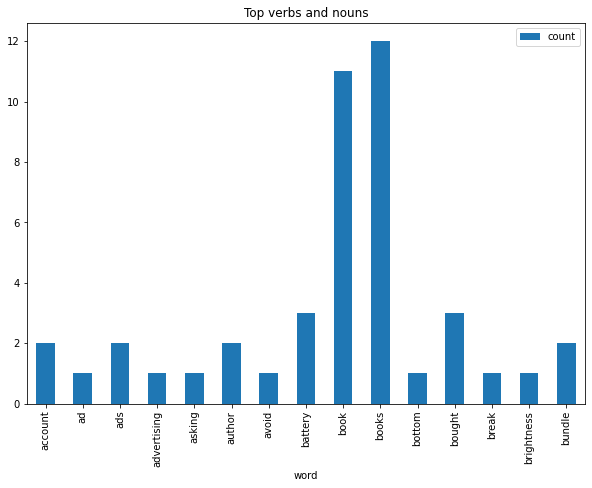

In [56]:
#Barchart for top 10 nouns + verbs
wf_df[0:15].plot.bar(x='word', figsize=(10,7), title='Top verbs and nouns')

#### Emotion Mining :

In [57]:
#Sentiment analysis
rohu = pd.read_csv('Afinn.csv', 
                   error_bad_lines=False, 
                   sep = ",", 
                   encoding = 'latin-1')
rohu

word  value
0       abandon     -2
1     abandoned     -2
2      abandons     -2
3      abducted     -2
4     abduction     -2
...         ...    ...
2472      yucky     -2
2473      yummy      3
2474     zealot     -2
2475    zealots     -2
2476    zealous      2

[2477 rows x 2 columns]

In [58]:
rohu[1500:]

word  value
1500  masterpieces      4
1501        matter      1
1502       matters      1
1503        mature      2
1504    meaningful      2
...            ...    ...
2472         yucky     -2
2473         yummy      3
2474        zealot     -2
2475       zealots     -2
2476       zealous      2

[977 rows x 2 columns]

In [59]:
from nltk import tokenize

sentences = tokenize.sent_tokenize(" ".join(kindle2))

#sentences[5:15]
sentences

['Before I start this review, I just want to say that I adore this e-reader regardless of any negative feedback.',
 'In fact, I took it over to show my mother and she loved it so much she got one for herself.',
 "For both of us, trying to read on a tablet for longer periods of time just isn't enjoyable.",
 'This is the first e-reader purchase for both of us after many years though I have had occasion to play with the newer generation of paperwhite/kindle in person before making this purchase.',
 'First things first - this device uses E-Ink.',
 'It works by having a multitude of microcapsules that when charged display either black or white.',
 "Just from that description alone, it's pretty obvious why this has no color, though color is in the works by the E-Ink developer, it's just years away from being workable on these types of devices.",
 'Obviously, this works differently than a tablet and its main purpose, as with all e-readers, is to give a good reading experience and mimic a page

In [60]:

sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

sentence
0      Before I start this review, I just want to say...
1      In fact, I took it over to show my mother and ...
2      For both of us, trying to read on a tablet for...
3      This is the first e-reader purchase for both o...
4           First things first - this device uses E-Ink.
...                                                  ...
13284  I upgraded from the original paper white Kindles.
13285          I like the screen and the responsiveness.
13286  The battery life is good, not quite what the p...
13287  I don't care for the design as it doesn't feel...
13288  If I had to purchase again, I may just go back...

[13289 rows x 1 columns]

In [61]:
affinity_scores = rohu.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [62]:
nlp = spacy.load('en_core_web_sm')

In [63]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        #print(sentence)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0) #return 0 if key not found
    return sent_score

In [64]:
# test that it works
calculate_sentiment(text = 'Amazing, wonderful session')

8

In [65]:
calculate_sentiment(text = 'wonderful session')

4

In [66]:
calculate_sentiment(text = 'great job, best explanation ever')

6

In [67]:
calculate_sentiment(text = 'good')

3

In [68]:
calculate_sentiment(text = 'What a ridiculous')

-3

In [69]:
calculate_sentiment(text = 'worst product and worst service ever')

-6

In [70]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [71]:
sent_df

sentence  sentiment_value
0      Before I start this review, I just want to say...                2
1      In fact, I took it over to show my mother and ...                3
2      For both of us, trying to read on a tablet for...                0
3      This is the first e-reader purchase for both o...                0
4           First things first - this device uses E-Ink.                0
...                                                  ...              ...
13284  I upgraded from the original paper white Kindles.                0
13285          I like the screen and the responsiveness.                2
13286  The battery life is good, not quite what the p...                3
13287  I don't care for the design as it doesn't feel...                3
13288  If I had to purchase again, I may just go back...                2

[13289 rows x 2 columns]

In [72]:
sent_df.iloc[4,0]

'First things first - this device uses E-Ink.'

In [73]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
#sent_df['word_count'].head(10)
sent_df

sentence  sentiment_value  \
0      Before I start this review, I just want to say...                2   
1      In fact, I took it over to show my mother and ...                3   
2      For both of us, trying to read on a tablet for...                0   
3      This is the first e-reader purchase for both o...                0   
4           First things first - this device uses E-Ink.                0   
...                                                  ...              ...   
13284  I upgraded from the original paper white Kindles.                0   
13285          I like the screen and the responsiveness.                2   
13286  The battery life is good, not quite what the p...                3   
13287  I don't care for the design as it doesn't feel...                3   
13288  If I had to purchase again, I may just go back...                2   

       word_count  
0              20  
1              21  
2              18  
3              32  
4               8  
...           ...  
13284           8  
13285           7  
13286          18  
13287          24  
13288          32  

[13289 rows x 3 columns]

In [74]:
sent_df.sort_values(by='sentiment_value').tail(10)

sentence  sentiment_value  \
11444  Pros:\nThe size, the warm lighting, more space...               13   
4622   I was able to gift my Paperwhite to a friend w...               13   
11911  I love, love, love the warm lighting that adju...               13   
6369   The light settings are fantastic, the thing is...               14   
1700   Love the improvements to it, lighting is great...               14   
7116   Yes it's nice, the thinner aluminum case is lo...               16   
13207  It's an Oasis, its fabulous, I love it, the ba...               17   
11445  The auto wake feature with a case is also real...               17   
6592   Pros:\n- Long battery life\n- Buttons --> I am...               17   
3685   To me this is the best feature, I would pay mo...               46   

       word_count  
11444          71  
4622           16  
11911          17  
6369           22  
1700           31  
7116           50  
13207          37  
11445          53  
6592          121  
3685          188

In [75]:
sent_df.sort_values(by='sentiment_value').head(15)

sentence  sentiment_value  \
9041   The main problem Im having now, however, is t...               -9   
7865   I am mad at being fooled and sucked into this ...               -8   
7378   Dead Pixel - If you look beside the second tit...               -8   
9782   Eventually it starts to flicker and even if yo...               -7   
37     I don't know what I did wrong but it's been a ...               -7   
2849   The whole screen has to be peeled off to acces...               -7   
2290   I developed terrible headaches, my eyes would ...               -7   
7601   This wide variation in quality and numerous re...               -7   
7866   Shame on Amazon.,\n\nOK I was mad about the la...               -7   
8211   I have the following problems (in addition to ...               -7   
5965     The bad:\n\nUsing the touch screen is terrible.               -6   
5706   I don't know if I got a bad one but battery li...               -6   
6414   When it died I replaced it with the "swipe" st...               -6   
9430   I was shocked and furious after paying the NEW...               -6   
13234  I have a paperwhite that has not failed me yet...               -6   

       word_count  
9041           54  
7865           11  
7378           29  
9782           43  
37             48  
2849           43  
2290           19  
7601           43  
7866           14  
8211           29  
5965            8  
5706           16  
6414           14  
9430           34  
13234          15

In [76]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    13289.000000
mean         0.965234
std          2.255936
min         -9.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         46.000000
Name: sentiment_value, dtype: float64

In [77]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

sentence  sentiment_value  \
2  For both of us, trying to read on a tablet for...                0   
3  This is the first e-reader purchase for both o...                0   
4       First things first - this device uses E-Ink.                0   
5  It works by having a multitude of microcapsule...                0   
6  Just from that description alone, it's pretty ...               -2   

   word_count  
2          18  
3          32  
4           8  
5          16  
6          35

In [78]:
sent_df[sent_df['sentiment_value']<-5]

sentence  sentiment_value  \
37     I don't know what I did wrong but it's been a ...               -7   
2161   And the kindle menu where you try to slowly mo...               -6   
2290   I developed terrible headaches, my eyes would ...               -7   
2298   I was crying because my eyes and head hurt so ...               -6   
2426   Problem I have with that is the newer Amazon c...               -6   
2849   The whole screen has to be peeled off to acces...               -7   
3072   As other reviewers have pointed out, the batte...               -6   
4116   Cons are battery life, buttons are a bit noisy...               -6   
4358   (remember those days...bad horror from the lat...               -6   
5706   I don't know if I got a bad one but battery li...               -6   
5965     The bad:\n\nUsing the touch screen is terrible.               -6   
6414   When it died I replaced it with the "swipe" st...               -6   
7278   The battery on this thing also sucks, you can'...               -6   
7378   Dead Pixel - If you look beside the second tit...               -8   
7601   This wide variation in quality and numerous re...               -7   
7865   I am mad at being fooled and sucked into this ...               -8   
7866   Shame on Amazon.,\n\nOK I was mad about the la...               -7   
8211   I have the following problems (in addition to ...               -7   
9041   The main problem Im having now, however, is t...               -9   
9154   First, the battery life on the Oasis is, in my...               -6   
9430   I was shocked and furious after paying the NEW...               -6   
9782   Eventually it starts to flicker and even if yo...               -7   
10736  Worst is the weight of the battery to the one ...               -6   
11107  that it can get wet without being destroyed an...               -6   
11808  If anything, the replacement Oasis is at least...               -6   
12985  The 'replacement''s battery life is just as ba...               -6   
13234  I have a paperwhite that has not failed me yet...               -6   

       word_count  
37             48  
2161           30  
2290           19  
2298           11  
2426           34  
2849           43  
3072           34  
4116           34  
4358           95  
5706           16  
5965            8  
6414           14  
7278           29  
7378           29  
7601           43  
7865           11  
7866           14  
8211           29  
9041           54  
9154           89  
9430           34  
9782           43  
10736          38  
11107          31  
11808          13  
12985          14  
13234          15

In [79]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence']

37      I don't know what I did wrong but it's been a ...
2161    And the kindle menu where you try to slowly mo...
2290    I developed terrible headaches, my eyes would ...
2298    I was crying because my eyes and head hurt so ...
2426    Problem I have with that is the newer Amazon c...
Name: sentence, dtype: object

In [80]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence'].tolist()

["I don't know what I did wrong but it's been a frustrating endeavor, and the inability to really have decent sort options can make it a pain for those who want to keep the library on this device instead of just a book or two at a time.",
 'And the kindle menu where you try to slowly move through your collection of books is terrible, slow, cluttered and bad as an operating system as it always has been.',
 'I developed terrible headaches, my eyes would water and I\x92d sometimes even cry and my eyeballs felt terribly strained.',
 'I was crying because my eyes and head hurt so badly.',
 'Problem I have with that is the newer Amazon covers are so thin that the edges are thin and dig into your hand which after a short time begins too bother me almost hurting.']

In [81]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence'].tolist()[0]

"I don't know what I did wrong but it's been a frustrating endeavor, and the inability to really have decent sort options can make it a pain for those who want to keep the library on this device instead of just a book or two at a time."

In [82]:
sent_df['index'] = range(0, len(sent_df))

<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

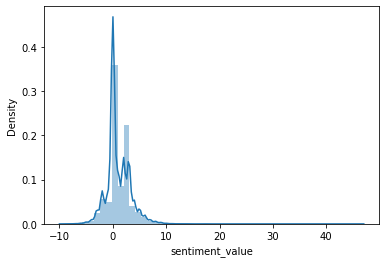

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

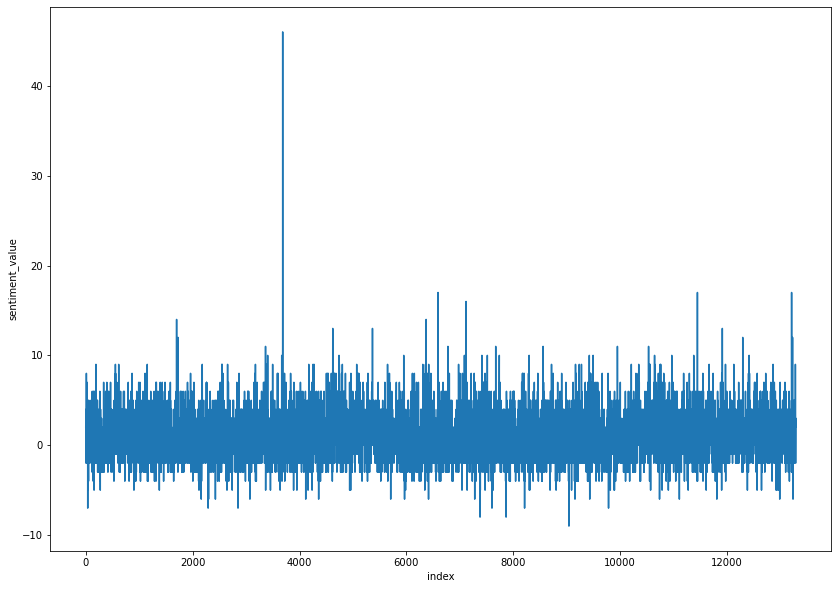

In [84]:
plt.figure(figsize=(14, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

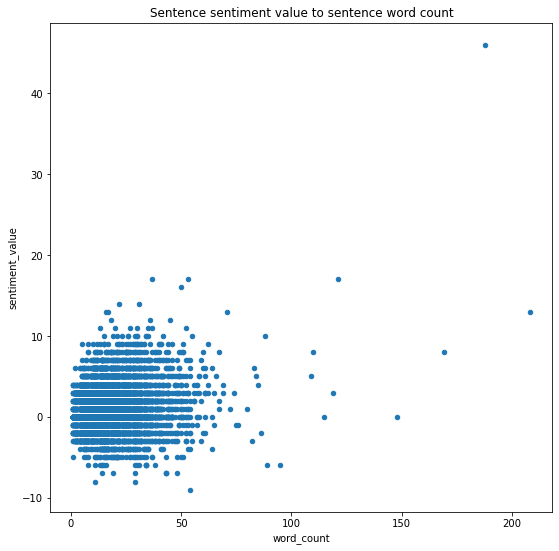

In [85]:
sent_df.plot.scatter(x='word_count',
                     y='sentiment_value',
                     figsize=(9,9),
                     title='Sentence sentiment value to sentence word count')

In [86]:
# PW for positive words 
# NW for Negative Words 

In [87]:
PW=pd.read_csv('positive-words.txt', 
               error_bad_lines = False)
PW

b'Skipping line 10: expected 1 fields, saw 2\nSkipping line 14: expected 1 fields, saw 5\nSkipping line 15: expected 1 fields, saw 3\nSkipping line 16: expected 1 fields, saw 2\nSkipping line 18: expected 1 fields, saw 3\nSkipping line 19: expected 1 fields, saw 3\nSkipping line 27: expected 1 fields, saw 3\nSkipping line 28: expected 1 fields, saw 2\n'


;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0                                                    ;                           
1                           ; Opinion Lexicon: Positive                          
2                                                     ;                          
3     ; This file contains a list of POSITIVE opinio...                          
4                                                     ;                          
...                                                 ...                          
2026                                           youthful                          
2027                                               zeal                          
2028                                             zenith                          
2029                                               zest                          
2030                                              zippy                          

[2031 rows x 1 columns]

In [88]:
NW=pd.read_csv('negative-words.txt', 
               error_bad_lines = False,
               encoding='latin-1')
NW

b'Skipping line 10: expected 1 fields, saw 2\nSkipping line 14: expected 1 fields, saw 5\nSkipping line 15: expected 1 fields, saw 3\nSkipping line 16: expected 1 fields, saw 2\nSkipping line 18: expected 1 fields, saw 3\nSkipping line 19: expected 1 fields, saw 3\nSkipping line 27: expected 1 fields, saw 3\nSkipping line 28: expected 1 fields, saw 2\n'


;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0                                                    ;                             
1                           ; Opinion Lexicon: Negative                            
2                                                     ;                            
3     ; This file contains a list of NEGATIVE opinio...                            
4                                                     ;                            
...                                                 ...                            
4803                                               zaps                            
4804                                             zealot                            
4805                                            zealous                            
4806                                          zealously                            
4807                                             zombie                            

[4808 rows x 1 columns]

In [89]:
PW =PW.iloc[25:]
PW =PW.rename(columns={';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;':'Words'})
PW.reset_index(inplace=True)
PW =PW.drop('index',axis=1)
PW['Score'] = 1
PW

Words  Score
0            a+      1
1        abound      1
2       abounds      1
3     abundance      1
4      abundant      1
...         ...    ...
2001   youthful      1
2002       zeal      1
2003     zenith      1
2004       zest      1
2005      zippy      1

[2006 rows x 2 columns]

In [90]:
NW = NW.iloc[25:]
NW = NW.rename(columns={';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;':'Words'})
NW.reset_index(inplace=True)
NW = NW.drop('index',axis=1)
NW['Score'] = -1
NW

Words  Score
0        2-faced     -1
1        2-faces     -1
2       abnormal     -1
3        abolish     -1
4     abominable     -1
...          ...    ...
4778        zaps     -1
4779      zealot     -1
4780     zealous     -1
4781   zealously     -1
4782      zombie     -1

[4783 rows x 2 columns]

In [91]:
affinity_scores1 = PW.set_index('Words')['Score'].to_dict()
affinity_scores2 = NW.set_index('Words')['Score'].to_dict()
affinity_scores1.update(affinity_scores2)
affinity_scores = affinity_scores1
affinity_scores

{'a+': 1,
 'abound': 1,
 'abounds': 1,
 'abundance': 1,
 'abundant': 1,
 'accessable': 1,
 'accessible': 1,
 'acclaim': 1,
 'acclaimed': 1,
 'acclamation': 1,
 'accolade': 1,
 'accolades': 1,
 'accommodative': 1,
 'accomodative': 1,
 'accomplish': 1,
 'accomplished': 1,
 'accomplishment': 1,
 'accomplishments': 1,
 'accurate': 1,
 'accurately': 1,
 'achievable': 1,
 'achievement': 1,
 'achievements': 1,
 'achievible': 1,
 'acumen': 1,
 'adaptable': 1,
 'adaptive': 1,
 'adequate': 1,
 'adjustable': 1,
 'admirable': 1,
 'admirably': 1,
 'admiration': 1,
 'admire': 1,
 'admirer': 1,
 'admiring': 1,
 'admiringly': 1,
 'adorable': 1,
 'adore': 1,
 'adored': 1,
 'adorer': 1,
 'adoring': 1,
 'adoringly': 1,
 'adroit': 1,
 'adroitly': 1,
 'adulate': 1,
 'adulation': 1,
 'adulatory': 1,
 'advanced': 1,
 'advantage': 1,
 'advantageous': 1,
 'advantageously': 1,
 'advantages': 1,
 'adventuresome': 1,
 'adventurous': 1,
 'advocate': 1,
 'advocated': 1,
 'advocates': 1,
 'affability': 1,
 'affable'

In [92]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        #print(sentence)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0) #return 0 if key not found
    return sent_score

In [93]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [94]:
sent_df

sentence  sentiment_value  \
0      Before I start this review, I just want to say...                0   
1      In fact, I took it over to show my mother and ...                1   
2      For both of us, trying to read on a tablet for...                1   
3      This is the first e-reader purchase for both o...                0   
4           First things first - this device uses E-Ink.                0   
...                                                  ...              ...   
13284  I upgraded from the original paper white Kindles.                0   
13285          I like the screen and the responsiveness.                1   
13286  The battery life is good, not quite what the p...                2   
13287  I don't care for the design as it doesn't feel...                0   
13288  If I had to purchase again, I may just go back...                1   

       word_count  index  
0              20      0  
1              21      1  
2              18      2  
3              32      3  
4               8      4  
...           ...    ...  
13284           8  13284  
13285           7  13285  
13286          18  13286  
13287          24  13287  
13288          32  13288  

[13289 rows x 4 columns]

In [95]:
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df

sentence  sentiment_value  \
0      Before I start this review, I just want to say...                0   
1      In fact, I took it over to show my mother and ...                1   
2      For both of us, trying to read on a tablet for...                1   
3      This is the first e-reader purchase for both o...                0   
4           First things first - this device uses E-Ink.                0   
...                                                  ...              ...   
13284  I upgraded from the original paper white Kindles.                0   
13285          I like the screen and the responsiveness.                1   
13286  The battery life is good, not quite what the p...                2   
13287  I don't care for the design as it doesn't feel...                0   
13288  If I had to purchase again, I may just go back...                1   

       word_count  index  
0              20      0  
1              21      1  
2              18      2  
3              32      3  
4               8      4  
...           ...    ...  
13284           8  13284  
13285           7  13285  
13286          18  13286  
13287          24  13287  
13288          32  13288  

[13289 rows x 4 columns]

In [96]:
sent_df.sort_values(by='sentiment_value').tail()

sentence  sentiment_value  \
558    Audible: I do read and like to be read to, so ...                8   
11445  The auto wake feature with a case is also real...                9   
6592   Pros:\n- Long battery life\n- Buttons --> I am...               10   
1362   And then there's that page flip thing... As yo...               10   
3685   To me this is the best feature, I would pay mo...               18   

       word_count  index  
558            50    558  
11445          53  11445  
6592          121   6592  
1362           84   1362  
3685          188   3685

In [97]:
sent_df.sort_values(by='sentiment_value').head()

sentence  sentiment_value  \
2290   I developed terrible headaches, my eyes would ...               -5   
9041   The main problem Im having now, however, is t...               -5   
10710  If you don't hate swiping the crappy touchscre...               -5   
9154   First, the battery life on the Oasis is, in my...               -5   
4298   It just felt clunky, slow and made me frustrat...               -4   

       word_count  index  
2290           19   2290  
9041           54   9041  
10710          28  10710  
9154           89   9154  
4298           13   4298

In [98]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    13289.000000
mean         0.509820
std          1.240587
min         -5.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         18.000000
Name: sentiment_value, dtype: float64

In [99]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<0].head()

sentence  sentiment_value  \
16  I can't say I was all that impressed with the ...               -1   
19  Sometimes it doesn't register when scrolling b...               -1   
23  I have issues with my eyes where blue light re...               -2   
37  I don't know what I did wrong but it's been a ...               -3   
39  That's terrible and to my understanding has be...               -2   

    word_count  index  
16          37     16  
19          15     19  
23          12     23  
37          48     37  
39          11     39

In [100]:
sent_df[sent_df['sentiment_value']<-1]

sentence  sentiment_value  \
23     I have issues with my eyes where blue light re...               -2   
37     I don't know what I did wrong but it's been a ...               -3   
39     That's terrible and to my understanding has be...               -2   
41     This is probably the biggest area that had a d...               -2   
52     This isn't a bad thing to me but has been off-...               -2   
...                                                  ...              ...   
13229  Then they send you a replacement (refurbished ...               -3   
13233  4 device failures in 2 years will make for qui...               -2   
13234  I have a paperwhite that has not failed me yet...               -2   
13235  I was skeptical of paying so much for an e-rea...               -2   
13282  Unfortunately, the ads are as annoying as I th...               -2   

       word_count  index  
23             12     23  
37             48     37  
39             11     39  
41             33     41  
52             17     52  
...           ...    ...  
13229          33  13229  
13233          16  13233  
13234          15  13234  
13235          17  13235  
13282          12  13282  

[453 rows x 4 columns]

In [101]:
sent_df[sent_df['sentiment_value']<-1].head(20)['sentence']

23     I have issues with my eyes where blue light re...
37     I don't know what I did wrong but it's been a ...
39     That's terrible and to my understanding has be...
41     This is probably the biggest area that had a d...
52     This isn't a bad thing to me but has been off-...
94     True, you see only your books on the library a...
101    Again, this is just aggravating, but not a maj...
137                I'll try to trouble shoot this issue.
139         My biggest concern is due to medical issues.
148    Let me break it down:\nPros:\n*Battery life: I...
152    So to me, it wasn't an issue, and it's no more...
163    Because my vision is limited, I'm clumsy and o...
164    I've dropped this thing numerous times on the ...
238    There is one exception: It's annoyingly slow w...
272    I have read some reviews that are upset about ...
274    I always keep the WiFi disabled unless I know ...
276    are very similar to what you see on a Kindle a...
327    Additionally, the downlo

In [102]:
sent_df[sent_df['sentiment_value']<-1].head(5)['sentence'].tolist()

['I have issues with my eyes where blue light really bothers me.',
 "I don't know what I did wrong but it's been a frustrating endeavor, and the inability to really have decent sort options can make it a pain for those who want to keep the library on this device instead of just a book or two at a time.",
 "That's terrible and to my understanding has been a longstanding problem.",
 "This is probably the biggest area that had a delay, lack of sensitivity to input, and a large amount of screen refreshing, but again, given what it is, it wasn't an issue really.",
 "This isn't a bad thing to me but has been off-putting to others with the slight delay."]

In [103]:
sent_df['index'] = range(0, len(sent_df))

<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

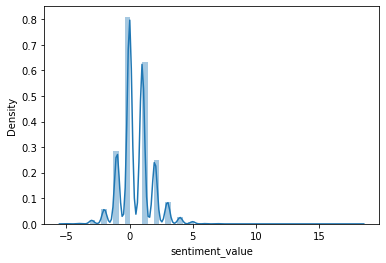

In [104]:
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

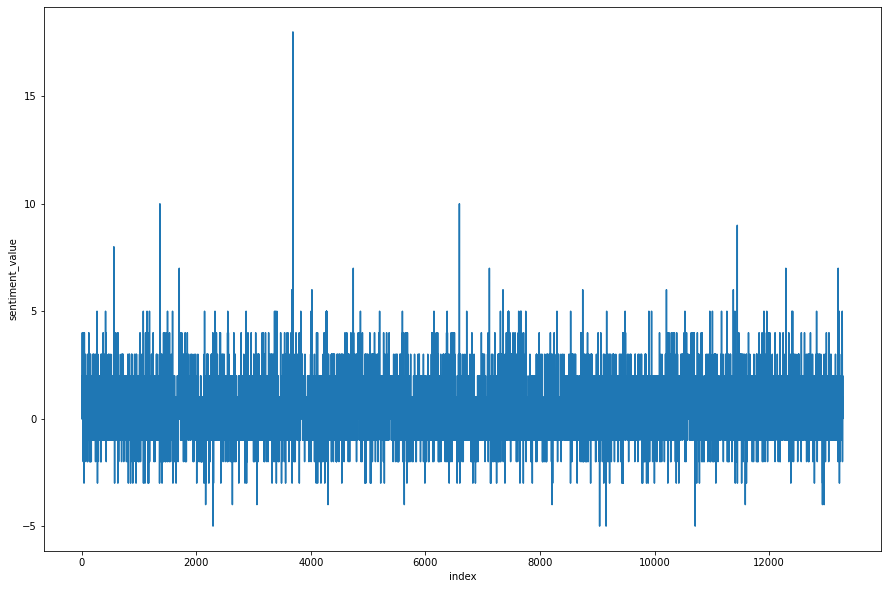

In [105]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

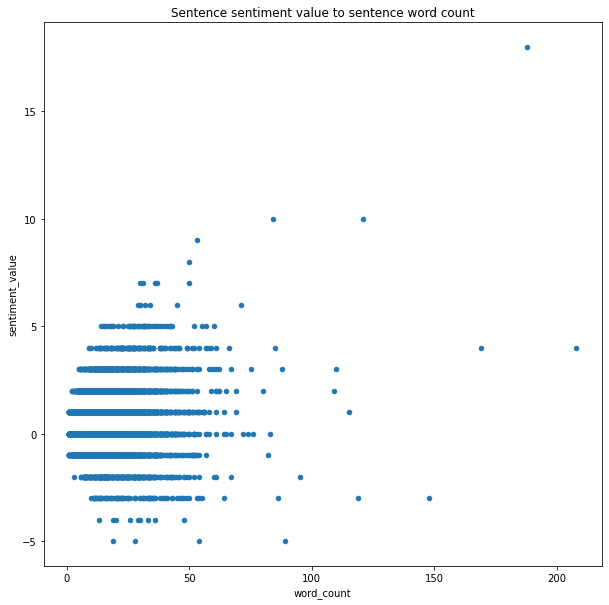

In [106]:
sent_df.plot.scatter(x='word_count',
                     y='sentiment_value',
                     figsize=(10,10),
                     title='Sentence sentiment value to sentence word count')

##### Positive and Negative words can't give us better results for sentimental analysis as compared to rohu(afinn dataset) which gives us better analysis.